<a href="https://colab.research.google.com/github/malinphy/MNIST_digits/blob/main/MNIST_DIGITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

from sklearn.model_selection import KFold

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape, x_test.shape, y_train.shape

((60000, 28, 28), (10000, 28, 28), (60000,))

In [4]:
x_train_norm = np.array(x_train)/255
y_train = np.array(y_train)
x_test_norm = np.array(x_test)/255
y_test = np.array(y_test)

acc_per_fold = []
loss_per_fold = []
hist_per_fold = []
np.unique(y_train)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(512,activation = tf.nn.relu),  #1.layer  512 means the number of neurons
        tf.keras.layers.Dense(10,activation = tf.nn.sigmoid)   ### 


])


model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

Res = model.fit(x_train_norm, y_train, epochs=20 ,verbose = 0)

In [5]:
inputs = np.concatenate((x_train_norm, x_test_norm), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

KFolder = KFold(n_splits = 5, shuffle=False)



for train, test in KFolder.split(inputs, targets):
  model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(512,activation = tf.nn.relu),  #1.layer  512 means the number of neurons
        tf.keras.layers.Dense(10,activation = tf.nn.sigmoid)   ### 
        ])


  model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

  Res = model.fit(x_train_norm, y_train, epochs=20 ,verbose = 0)
  scores = model.evaluate(inputs[test],targets[test], verbose = 0)

In [6]:
Res.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0, 0.5, 'loss')

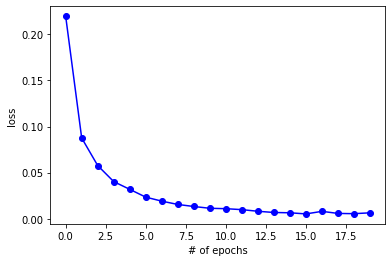

In [7]:
plt.plot(Res.history['loss'],'-ob')
plt.xlabel('# of epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

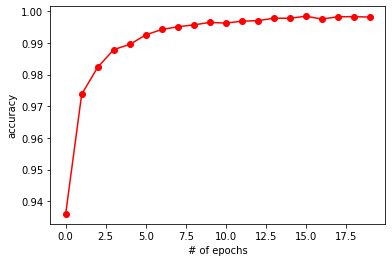

In [8]:
plt.plot(Res.history['accuracy'],'-or')
plt.xlabel('# of epochs')
plt.ylabel('accuracy')

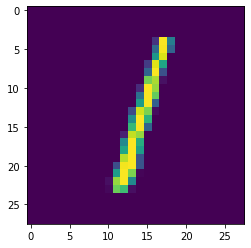

In [9]:
plt.imshow(x_test[2,:,:])

In [10]:
res=model.predict(x_test)

In [11]:
res[2,:]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
# At the beginning of the model neither training nor test sets were normalized. Therefore 
# final accuracy is around 95 %.
# To overcome this issue, we need to increase the number of iteration or 
# normalize the train and test sets.